In [0]:
from pyspark.sql import SparkSession

In [0]:
# File location and type
file_location = "/FileStore/tables/car_prices__1.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df1 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

#display(df1)
df1.head()

Out[58]: Row(year='2015', make='Kia', model='Sorento', trim='LX', body='SUV', transmission='automatic', vin='5xyktca69fg566472', state='ca', condition='5', odometer='16639', color='white', interior='black', seller='kia motors america, inc', mmr='20500', sellingprice='21500', saledate='Tue Dec 16 2014 12:30:00 GMT-0800 (PST)')

In [0]:
#df1.cache()
df1.printSchema()

root
 |-- year: string (nullable = true)
 |-- make: string (nullable = true)
 |-- model: string (nullable = true)
 |-- trim: string (nullable = true)
 |-- body: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- vin: string (nullable = true)
 |-- state: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- odometer: string (nullable = true)
 |-- color: string (nullable = true)
 |-- interior: string (nullable = true)
 |-- seller: string (nullable = true)
 |-- mmr: string (nullable = true)
 |-- sellingprice: string (nullable = true)
 |-- saledate: string (nullable = true)



In [0]:
#removed vin, seller & saledate
dfreal = df1.selectExpr("cast(year as int) year",
                       "cast(make as string) make",
                       "cast(model as string) model",
                       "cast(trim as string) trim",
                       "cast(body as string) body",
                       "cast(transmission as string) transmission",
                       "cast(state as string) state",
                       "cast(condition as int) condition",
                       "cast(odometer as int) odometer",
                       "cast(color as string) color",
                       "cast(interior as string) interior",
                       "cast(mmr as int) mmr",
                       "cast(sellingprice as int) sellingprice")

In [0]:
#dimensions of data
dfreal.count(),len(dfreal.columns)


Out[61]: (139709, 13)

In [0]:
dfreal.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
year,139709,2009.454272809912,4.2083305608464,1984,2015
make,138816,None,None,Acura,vw
model,138789,781.5907663316583,795.1166806825476,1,yukon
trim,138492,342.9599756690999,790.2424256536409,!,zx3
body,135970,None,None,Access Cab,sedan
transmission,123515,None,None,automatic,manual
state,139709,None,None,ab,wi
condition,127917,2.8783273528928914,1.0265643893203344,1,5
odometer,139632,73380.25666752608,56946.73300025219,1,999999


In [0]:

# import sql function pyspark
import pyspark.sql.functions as f

# null values in each column
data_agg = dfreal.agg(*[f.count(f.when(f.isnull(c), c)).alias(c) for c in dfreal.columns])
data_agg.show()

+----+----+-----+----+----+------------+-----+---------+--------+-----+--------+---+------------+
|year|make|model|trim|body|transmission|state|condition|odometer|color|interior|mmr|sellingprice|
+----+----+-----+----+----+------------+-----+---------+--------+-----+--------+---+------------+
|   0| 893|  920|1217|3739|       16194|    0|    11792|      77|  247|     247|  0|           0|
+----+----+-----+----+----+------------+-----+---------+--------+-----+--------+---+------------+



In [0]:
# value counts of Batsman_Name column
dfreal.groupBy('make').count().show()

+-----------+-----+
|       make|count|
+-----------+-----+
| Volkswagen| 3149|
| Oldsmobile|  115|
|   Infiniti| 3718|
|      buick|   14|
| land rover|  128|
|      Lexus| 2813|
|     Jaguar|  415|
|     Saturn|  850|
|       FIAT|  205|
|   Maserati|   18|
|      Scion|  443|
|Rolls-Royce|    2|
|       Jeep| 3794|
| Mitsubishi| 1076|
| mitsubishi|  117|
|    pontiac|   27|
|        Kia| 4577|
|      lexus|  117|
|       null|  893|
|  Chevrolet|14788|
+-----------+-----+
only showing top 20 rows



In [0]:
#Filling missing values as per column data type. \ Categorical columns -> Mode \ Continous columns -> Mean/Median \ Discreate columns -> Mode
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']
continous_columns = ['year', 'condition', 'odometer', 'mmr','sellingprice']


In [0]:
categorical_columns

Out[66]: ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']

In [0]:
continous_columns

Out[67]: ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

In [0]:
# Remove the target column from the input feature set.
#featuresCols = df.columns
#featuresCols.remove('sellingprice')

In [0]:
dfreal=dfreal.dropna()

In [0]:
# Create a 70-30 train test split

train_data,test_data=dfreal.randomSplit([0.7,0.3])

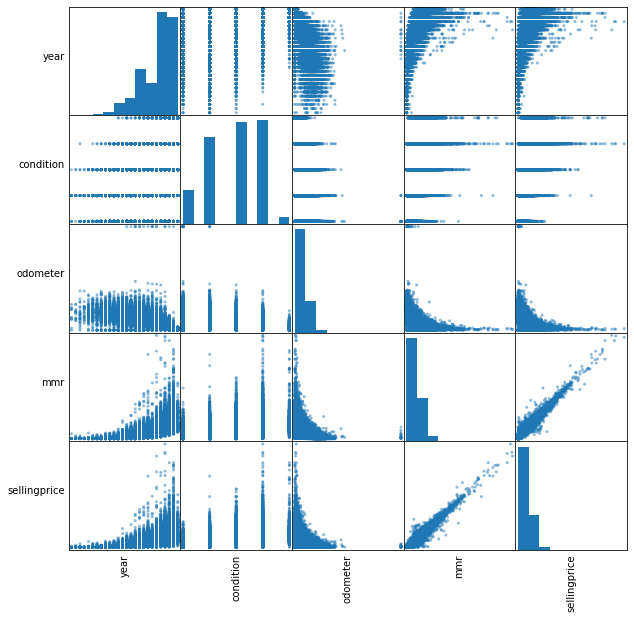

In [0]:
import pandas as pd
numeric_features = [t[0] for t in dfreal.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = dfreal.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [0]:
import six
for i in dfreal.columns:
    if not( isinstance(dfreal.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to sellingprice for ", i, dfreal.stat.corr('sellingprice',i))

Correlation to sellingprice for  year 0.6037693465587427
Correlation to sellingprice for  condition 0.5331359245591835
Correlation to sellingprice for  odometer -0.5889616470448341
Correlation to sellingprice for  mmr 0.9829229509732622
Correlation to sellingprice for  sellingprice 1.0


In [0]:
# Import the required libraries

from pyspark.ml.regression import LinearRegression  #Note regression after pyspark.ml
from pyspark.ml.feature import VectorAssembler,StringIndexer,StandardScaler,OneHotEncoder
#from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

In [0]:
#from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
#categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
stages = []
for categoricalCol in categorical_columns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index',handleInvalid='keep')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
#label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
#stages += [label_stringIdx]

continous_columns = ['year', 'condition', 'odometer', 'mmr']
#featuresCols.remove('sellingprice')
#numericCols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
assemblerInputs = [c + "classVec" for c in categorical_columns] + continous_columns
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [0]:
stages

Out[74]: [StringIndexer_2a1e98c88f57,
 OneHotEncoder_79495a7f7ffc,
 StringIndexer_bac1652d7752,
 OneHotEncoder_6a8eaf5f8ac2,
 StringIndexer_0eeb422eebba,
 OneHotEncoder_c0b81e40c276,
 StringIndexer_aaf555617279,
 OneHotEncoder_8cb430f78cdf,
 StringIndexer_89e02df1f694,
 OneHotEncoder_84c8c31d1989,
 StringIndexer_94b78716668d,
 OneHotEncoder_a80c08dc7316,
 StringIndexer_0c721c481f48,
 OneHotEncoder_9425a121147d,
 StringIndexer_5b11a072c8e2,
 OneHotEncoder_27be91d9c9cf,
 VectorAssembler_aacb68899367]

In [0]:
# Use StringIndexer to convert the categorical columns to hold numerical data
#year_indexer = StringIndexer(inputCol='year',outputCol='year_index',handleInvalid='keep')
#make_indexer = StringIndexer(inputCol='make',outputCol='make_index',handleInvalid='keep')
#model_indexer = StringIndexer(inputCol='model',outputCol='model_index',handleInvalid='keep')
#trim_indexer = StringIndexer(inputCol='trim',outputCol='trim_index',handleInvalid='keep')
#body_indexer = StringIndexer(inputCol='body',outputCol='body_index',handleInvalid='keep')
#transmission_indexer = StringIndexer(inputCol='transmission',outputCol='transmission_index',handleInvalid='keep')
#state_indexer = StringIndexer(inputCol='state',outputCol='state_index',handleInvalid='keep')
#condition_group_indexer = StringIndexer(inputCol='condition',outputCol='condition_index',handleInvalid='keep')
#odometer_indexer = StringIndexer(inputCol='odometer',outputCol='odometer_index',handleInvalid='keep')
#color_group_indexer = StringIndexer(inputCol='color',outputCol='color_group_index',handleInvalid='keep')
#interior_indexer = StringIndexer(inputCol='interior',outputCol='interior_index',handleInvalid='keep')

In [0]:
#from pyspark.ml.feature import VectorAssembler
#vectorAssembler = VectorAssembler(inputCols = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior'], outputCol = 'unscaled_features')
#vectorAssembler = VectorAssembler(inputCols = ['year', 'condition', 'odometer', 'mmr'], outputCol = 'features')
#vcarprices_df = vectorAssembler.transform(dfreal)
#vcarprices_df = vhouse_df.select(['features', 'sellingprice'])
#vcarprices_df.show(3)

+--------------------+------------+
|            features|sellingprice|
+--------------------+------------+
|[2015.0,5.0,16639...|       21500|
|[2015.0,5.0,9393....|       21500|
|[2014.0,4.0,1331....|       30000|
+--------------------+------------+
only showing top 3 rows



In [0]:
# Standard scaler is used to scale the data for the linear SVC to perform well on the training data

#scaler = StandardScaler(inputCol="unscaled_features",outputCol="features")

In [0]:
# Create an object for the Linear Regression model
# The next step is to define the model training stage of the pipeline. 
# The following command defines a GBTRegressor model that takes an input column "features" by default and learns to predict the labels in the "cnt" column.

lr_model = LinearRegression(labelCol='sellingprice')

In [0]:
# Pipeline is used to pass the data through indexer and assembler simultaneously. Also, it helps to pre-rocess the test data
# in the same way as that of the train data. It also 

#pipe = Pipeline(stages=[make_indexer,model_indexer,trim_indexer,body_indexer,
#                        transmission_indexer,state_indexer,color_indexer,interior_indexer,assembler,scaler,svc_model])
#from pyspark.ml import Pipeline
#pipe = Pipeline(stages=[make_indexer,model_indexer,trim_indexer,body_indexer,
#                        transmission_indexer,state_indexer,color_indexer,interior_indexer,assembler,scaler,svc_model])
stages += [lr_model]
pipe = Pipeline(stages=stages)

In [0]:
stages

Out[82]: [StringIndexer_2a1e98c88f57,
 OneHotEncoder_79495a7f7ffc,
 StringIndexer_bac1652d7752,
 OneHotEncoder_6a8eaf5f8ac2,
 StringIndexer_0eeb422eebba,
 OneHotEncoder_c0b81e40c276,
 StringIndexer_aaf555617279,
 OneHotEncoder_8cb430f78cdf,
 StringIndexer_89e02df1f694,
 OneHotEncoder_84c8c31d1989,
 StringIndexer_94b78716668d,
 OneHotEncoder_a80c08dc7316,
 StringIndexer_0c721c481f48,
 OneHotEncoder_9425a121147d,
 StringIndexer_5b11a072c8e2,
 OneHotEncoder_27be91d9c9cf,
 VectorAssembler_aacb68899367,
 LinearRegression_18405c8774d2]

In [0]:
# The total duration to train the model was around 30 minnutes

fit_model=pipe.fit(train_data)

In [0]:
# Store the results in a dataframe

results = fit_model.transform(test_data)
display(results)

year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,makeIndex,makeclassVec,modelIndex,modelclassVec,trimIndex,trimclassVec,bodyIndex,bodyclassVec,transmissionIndex,transmissionclassVec,stateIndex,stateclassVec,colorIndex,colorclassVec,interiorIndex,interiorclassVec,features,prediction
1991,Lexus,LS 400,Base,Sedan,automatic,ca,2,171533,silver,silver,1075,1400,14.0,"Map(vectorType -> sparse, length -> 50, indices -> List(14), values -> List(1.0))",383.0,"Map(vectorType -> sparse, length -> 671, indices -> List(383), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 1182, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 43, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 33, indices -> List(0), values -> List(1.0))",3.0,"Map(vectorType -> sparse, length -> 20, indices -> List(3), values -> List(1.0))",7.0,"Map(vectorType -> sparse, length -> 17, indices -> List(7), values -> List(1.0))","Map(vectorType -> sparse, length -> 2022, indices -> List(14, 433, 721, 1903, 1946, 1948, 1984, 2008, 2018, 2019, 2020, 2021), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1991.0, 2.0, 171533.0, 1075.0))",2016.0663066966663
1992,Cadillac,DeVille,Base,Sedan,automatic,ca,3,114502,white,blue,925,400,17.0,"Map(vectorType -> sparse, length -> 50, indices -> List(17), values -> List(1.0))",161.0,"Map(vectorType -> sparse, length -> 671, indices -> List(161), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 1182, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 43, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 33, indices -> List(0), values -> List(1.0))",1.0,"Map(vectorType -> sparse, length -> 20, indices -> List(1), values -> List(1.0))",8.0,"Map(vectorType -> sparse, length -> 17, indices -> List(8), values -> List(1.0))","Map(vectorType -> sparse, length -> 2022, indices -> List(17, 211, 721, 1903, 1946, 1948, 1982, 2009, 2018, 2019, 2020, 2021), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1992.0, 3.0, 114502.0, 925.0))",2173.2167551899765
1992,Honda,Accord,LX,Sedan,automatic,ca,2,216503,black,gray,575,500,4.0,"Map(vectorType -> sparse, length -> 50, indices -> List(4), values -> List(1.0))",5.0,"Map(vectorType -> sparse, length -> 671, indices -> List(5), values -> List(1.0))",2.0,"Map(vectorType -> sparse, length -> 1182, indices -> List(2), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 43, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 33, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 20, indices -> List(0), values -> List(1.0))",1.0,"Map(vectorType -> sparse, length -> 17, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 2022, indices -> List(4, 55, 723, 1903, 1946, 1948, 1981, 2002, 2018, 2019, 2020, 2021), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1992.0, 2.0, 216503.0, 575.0))",1789.911498937261
1993,Lexus,ES 300,Base,Sedan,automatic,ca,2,169391,beige,gray,1075,500,14.0,"Map(vectorType -> sparse, length -> 50, indices -> List(14), values -> List(1.0))",239.0,"Map(vectorType -> sparse, length -> 671, indices -> List(239), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 1182, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 43, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 33, indices -> List(0), values -> List(1.0))",10.0,"Map(vectorType -> sparse, length -> 20, 

In [0]:
#results.show()
results.select(['sellingprice','prediction']).show()

+------------+------------------+
|sellingprice|        prediction|
+------------+------------------+
|        1400|2016.0663066966663|
|         400|2173.2167551899765|
|         500| 1789.911498937261|
|         500|1676.9967654531793|
|        1600|1856.3508093866985|
|         250| 835.9615231702483|
|         325|1455.5513950145396|
|        5600|4121.2420475046965|
|         400|1444.3224638975225|
|         250|168.76208150030288|
|         300| 581.6372233215807|
|         900| 845.3902782725636|
|         250|1288.6615978327754|
|        1300| 1766.832436656754|
|         900| 6703.992789793192|
|         850|-220.8305487245234|
|         600| 570.9204085188394|
|        2000| 928.0362781815347|
|        1100| 1050.944031875566|
|         800|1246.4728895010776|
+------------+------------------+
only showing top 20 rows



In [0]:
#And evaluate how well is our model doing. Our metrics will be RMSE, MSE, MAE and R^2.

from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="sellingprice", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(results)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(results, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(results, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(results, {eval.metricName: "r2"})
print("r2: %.3f" %r2)

RMSE: 1589.945
MSE: 2527924.320
MAE: 1013.660
r2: 0.972


In [0]:
eval.explainParams()

Out[98]: 'labelCol: label column name. (default: label, current: sellingprice)\nmetricName: metric name in evaluation - one of:\n                       rmse - root mean squared error (default)\n                       mse - mean squared error\n                       r2 - r^2 metric\n                       mae - mean absolute error\n                       var - explained variance. (default: rmse, current: rmse)\npredictionCol: prediction column name. (default: prediction, current: prediction)\nthroughOrigin: whether the regression is through the origin. (default: False)\nweightCol: weight column name. If this is not set or empty, we treat all instance weights as 1.0. (undefined)'